# OneClass SVM



## 0.환경준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# 모델링을 위해 필요한 함수를 불러 옵니다.
from sklearn.svm import OneClassSVM # <-- One Class SVM!
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## 1.One Class SVM 개념이해

> sklearn help : https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html  
One Class SVM Paper('Support Vector Method for Novelty Detection') : https://proceedings.neurips.cc/paper/1999/file/8725fb777f25776ffa9076e44fcfd776-Paper.pdf

### 1.1 샘플데이터 가져오기

In [ ]:
# Single Blob
X1 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X.csv')

# Double Blob
X2 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X2.csv')

#### 1) Single Blob

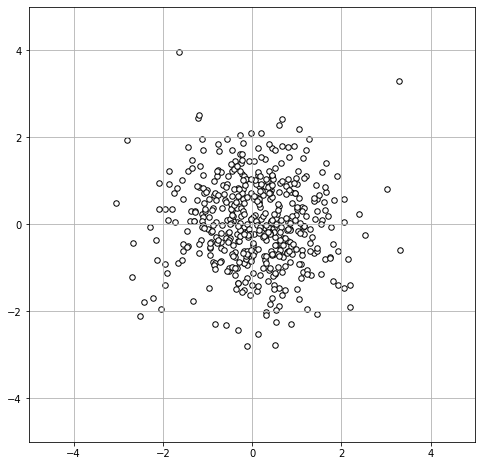

In [ ]:
# sample data
plt.figure(figsize = (8,8))

plt.scatter(X1['v1'], X1['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* One Class SVM 모델을 일단 만들어 봅시다.

In [ ]:
# 모델링
model = OneClassSVM()
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [ ]:
# 메쉬그리드값 저장하기
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

# 메쉬 그리드값에 대해 모델 부터 거리 값 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

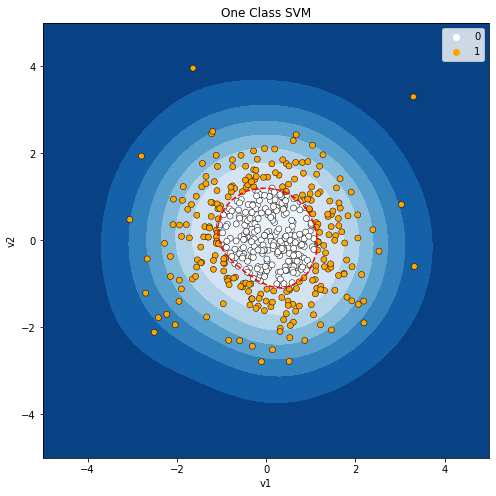

In [ ]:
plt.figure(figsize = (8,8))
plt.title("One Class SVM")

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r) # 거리별 등고선
plt.contour(xx, yy, Z, levels=[0], colors='r', linestyles  = '--')

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(X1['v1'], X1['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

* 몇가지를 조절해 봅시다.
    * nu
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * gamma
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

In [ ]:
# 리스트 값의 조합을 쉽게 만들어 주는 함수
from itertools import product 
nu = [0.05, 0.3, 0.6]
gamma = [0.1, 1, 5]
items = [nu, gamma] 
params = list(product(*items))
params

[(0.05, 0.1),
 (0.05, 1),
 (0.05, 5),
 (0.3, 0.1),
 (0.3, 1),
 (0.3, 5),
 (0.6, 0.1),
 (0.6, 1),
 (0.6, 5)]

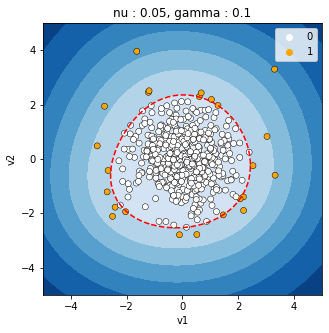

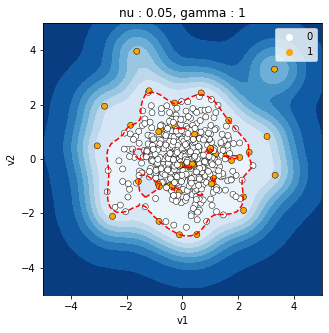

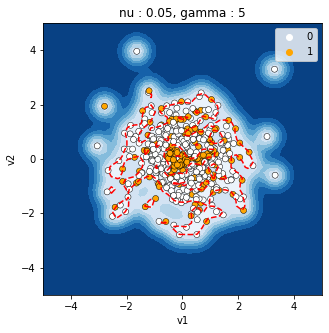

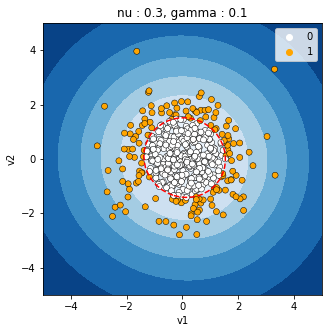

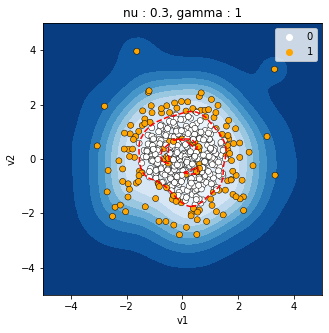

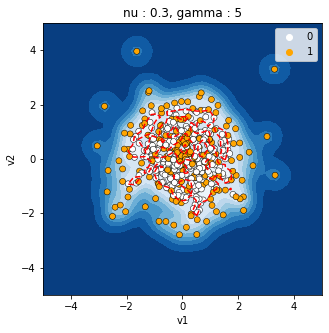

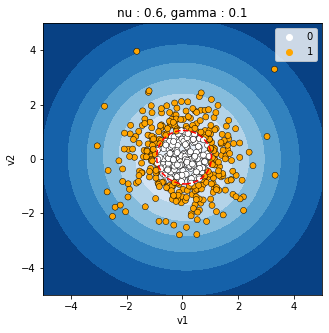

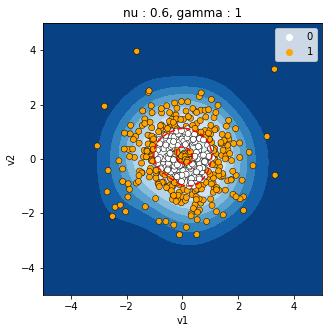

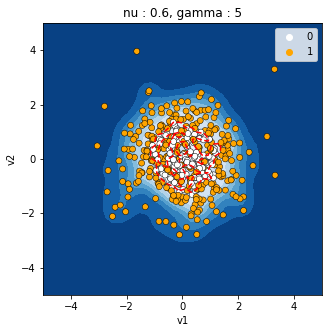

In [ ]:
# 반복문으로 값의 조합에 대해 모델을 시각화 해 봅시다.
for p in params :
    # 모델링
    model = OneClassSVM(nu = p[0], gamma = p[1])
    model.fit(X1)
    pred = model.predict(X1)
    pred = np.where(pred == 1, 0, 1)

    # 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
    Z = Z.reshape(xx.shape)

    # 시각화
    plt.figure(figsize = (5,5))
    plt.title(f'nu : {p[0]}, gamma : {p[1]}')

    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r) # 거리별 등고선
    plt.contour(xx, yy, Z, levels=[0], colors='r', linestyles  = '--')

    # 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
    sns.scatterplot(X1['v1'], X1['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

    plt.axis("tight")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

#### 2) Double Blob

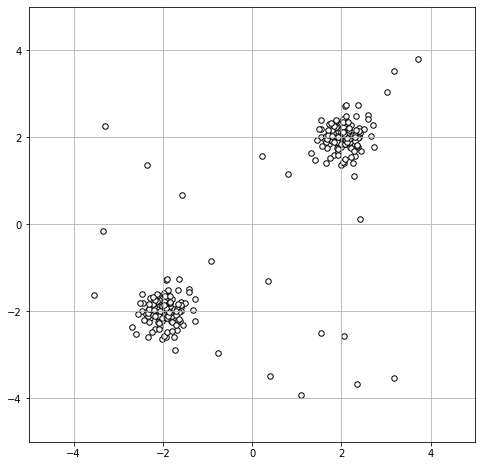

In [ ]:
plt.figure(figsize = (8,8))

plt.scatter(X2['v1'], X2['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* One Class SVM 모델을 일단 만들어 봅시다.

In [ ]:
# 모델링
model = OneClassSVM()
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [ ]:
# 메쉬그리드값 저장하기
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

# 메쉬 그리드값에 대해 모델 부터 거리 값 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

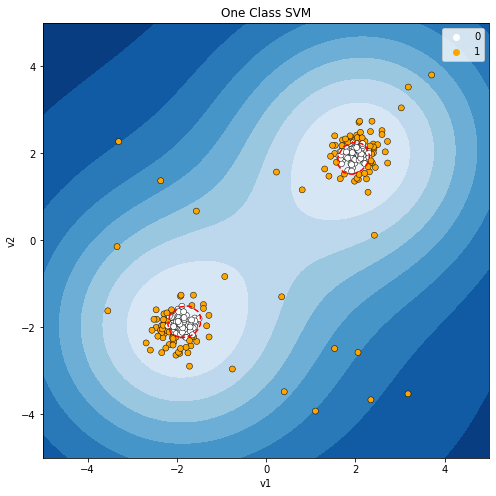

In [ ]:
plt.figure(figsize = (8,8))
plt.title("One Class SVM")

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r) # 거리별 등고선
plt.contour(xx, yy, Z, levels=[0], colors='r', linestyles  = '--')

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(X2['v1'], X2['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

* 몇가지를 조절해 봅시다.
    * nu
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * gamma
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

In [ ]:
# 리스트 값의 조합을 쉽게 만들어 주는 함수
from itertools import product 
nu = [0.05, 0.3, 0.6]
gamma = [0.1, 1, 5]
items = [nu, gamma] 
params = list(product(*items))
params

[(0.05, 0.1),
 (0.05, 1),
 (0.05, 5),
 (0.3, 0.1),
 (0.3, 1),
 (0.3, 5),
 (0.6, 0.1),
 (0.6, 1),
 (0.6, 5)]

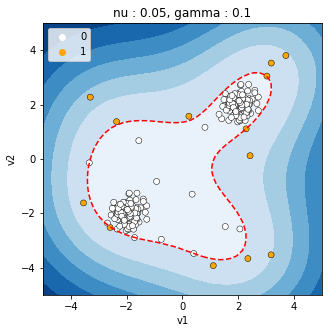

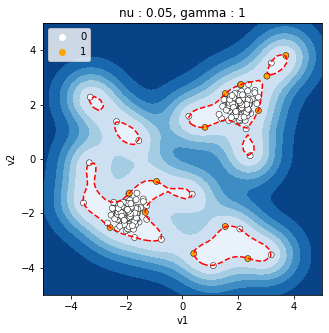

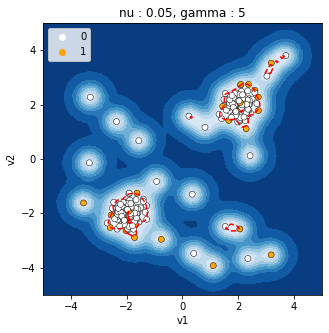

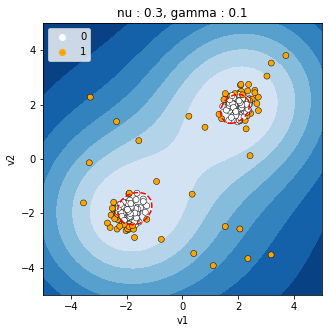

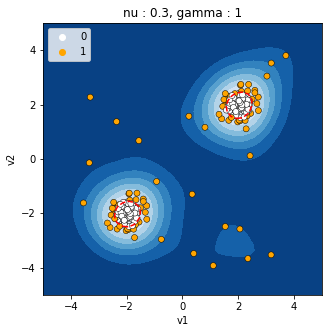

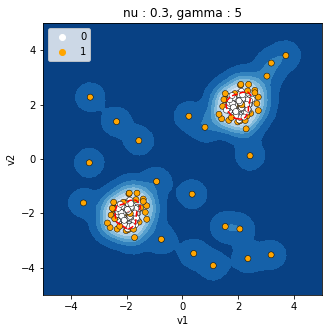

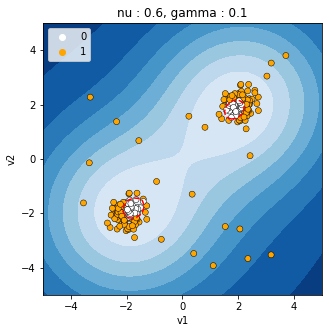

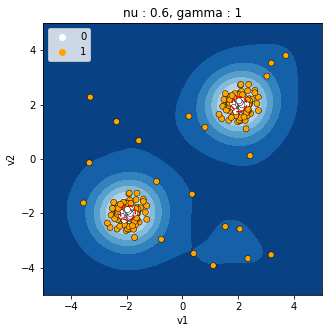

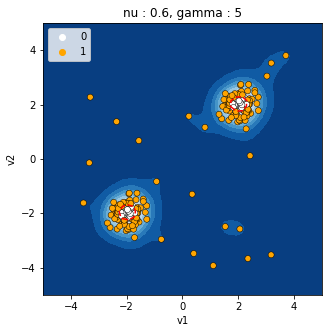

In [ ]:
# 반복문으로 값의 조합에 대해 모델을 시각화 해 봅시다.
for p in params :
    # 모델링
    model = OneClassSVM(nu = p[0], gamma = p[1])
    model.fit(X2)
    pred = model.predict(X2)
    pred = np.where(pred == 1, 0, 1)

    # 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
    Z = Z.reshape(xx.shape)

    # 시각화
    plt.figure(figsize = (5,5))
    plt.title(f'nu : {p[0]}, gamma : {p[1]}')

    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r) # 거리별 등고선
    plt.contour(xx, yy, Z, levels=[0], colors='r', linestyles  = '--')

    # 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
    sns.scatterplot(X2['v1'], X2['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

    plt.axis("tight")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

## 2.직원 이직 여부를 예측해 봅시다.

### 2.1 데이터 준비

* 데이터 로딩

In [ ]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


* x, y 로 나누기

In [ ]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [ ]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화


In [ ]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state=2022)

In [ ]:
x_train.shape, x_val.shape

((805, 38), (345, 38))

* 스케일링

In [ ]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

#### 학습용 데이터 준비

* 학습을 위해서는 **Normal 데이터**만 이용합니다.

In [ ]:
x_train0 = x_train_s[y_train == 0]

### 2.2 모델링

#### 1) 기본값으로 학습

In [ ]:
model = OneClassSVM()
model.fit(x_train0)

OneClassSVM()

In [ ]:
pred = model.predict(x_val_s)
pred

array([ 1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1

* 예측 후 결과가 -1, 1로 나옵니다.
* 이상치를 1로, 정상을 0으로 변환하겠습니다.

In [ ]:
pred = np.where(pred == 1, 0, 1)

* 평가

In [ ]:
print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

[[157 166]
 [  7  15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.49      0.64       323
           1       0.08      0.68      0.15        22

    accuracy                           0.50       345
   macro avg       0.52      0.58      0.40       345
weighted avg       0.90      0.50      0.61       345



#### 2) 하이퍼파라미터 nu 값 조정하기

* nu 값을 0.001 ~ 1사이에서 조금씩 조정하며 50개 값으로 실험해 봅시다.

In [ ]:
params = np.linspace(0.001,1,50) 
f1 = []

for nu in params :
    model = OneClassSVM(nu=nu)
    model.fit(x_train)
    pred = model.predict(x_val)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

* f1 값이 최대화 될 때의 nu 값을 뽑아 봅시다.

In [ ]:
nu_f1_max = params[np.argmax(f1)]
nu_f1_max

0.07163636363636364

* 이제 차트를 그려서 추세를 분석해 봅시다.

nu : 0.07163636363636364, f1_max : 0.21052631578947367


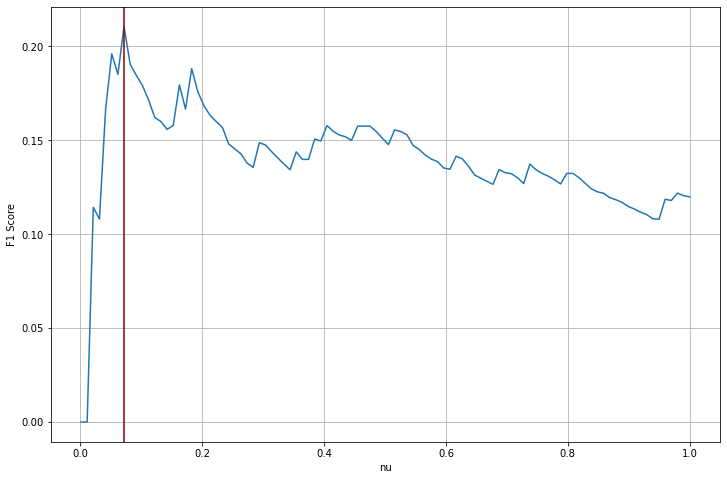

In [ ]:
print( f'nu : {nu_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(nu_f1_max, color = 'darkred')
plt.ylabel('F1 Score')
plt.xlabel('nu')
plt.grid()
plt.show()

## 3.실습 : Semiconductor manufacturing process dataset


![](https://assets.pandaily.com/uploads/2021/10/semiconductor.png)

* 반도체 제조 공정은 시점별로 수많은 센서로부터 정보를 수집하여 공정을 감시합니다. 
* 센서정보와 함께 공정간 발생된 불량품에 대한 정보를 저장하였습니다.
* 불량을 예측해 봅시다.

### 3.1 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# 모델링을 위해 필요한 함수를 불러 옵니다.
from sklearn.svm import OneClassSVM # <-- One Class SVM!
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

* 데이터 로딩

In [2]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)
data.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v528,v571,v572,v573,v574,v575,v576,v577,v578,label
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


변수 정보 
* label : 1 - 불량, 0 - 정상
* v### : 센서값들


In [3]:
target = 'label'

In [4]:
data[target].value_counts() / data.shape[0]

0    0.933631
1    0.066369
Name: label, dtype: float64

* x, y로 나누기 

In [5]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 Dummy Variable

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [8]:
print(x_train.shape, x_val.shape)

(1253, 52) (314, 52)


* 스케일링(Optional) 
    * 스케일링을 필요로 하는 알고리즘이 있습니다. 
    * SVM은 스케일링을 필요로 합니다.

In [9]:
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

* 학습용 데이터 준비

In [10]:
x_train0 = x_train_s[y_train == 0]

### 3.2 모델링

#### 1) 기본값으로 모델링

In [11]:
model = OneClassSVM()
model.fit(x_train0)
pred = model.predict(x_val_s)
pred = np.where(pred == 1, 0, 1)

print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

[[144 152]
 [  8  10]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.49      0.64       296
           1       0.06      0.56      0.11        18

    accuracy                           0.49       314
   macro avg       0.50      0.52      0.38       314
weighted avg       0.90      0.49      0.61       314



#### 2) nu 값을 조절하면서 f1 score를 비교해 봅시다.

In [22]:
params = np.linspace(0.001,1,100) 
f1 = []

for nu in params :
    model = OneClassSVM(nu=nu)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

In [23]:
nu_f1_max = params[np.argmax(f1)]
nu_f1_max

0.05145454545454546

nu : 0.05145454545454546, f1_max : 0.1951219512195122


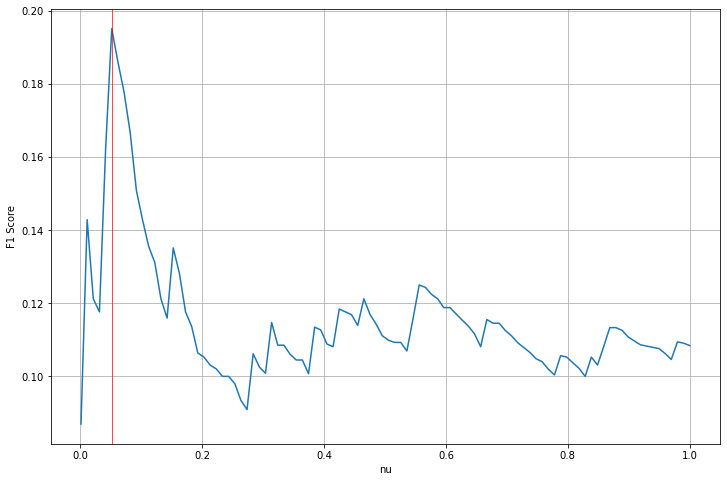

In [24]:
print( f'nu : {nu_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(nu_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('nu')
plt.grid()
plt.show()

#### 3) gamma값을 조절하면서 f1 score를 비교해 봅시다.

In [25]:
params = np.linspace(0.1,10,50) 
f1 = []

for g in params :
    model = OneClassSVM(nu=0.05, gamma = g)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

In [26]:
nu_f1_max = params[np.argmax(f1)]
nu_f1_max

0.1

gamma : 0.1, f1_max : 0.19999999999999998


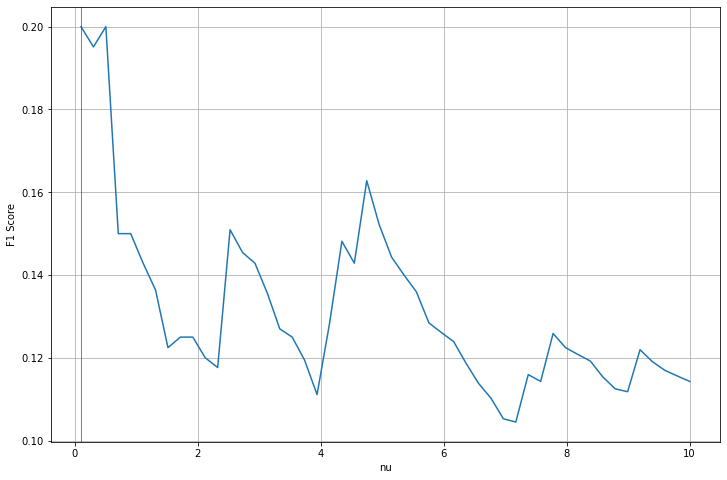

In [27]:
print( f'gamma : {nu_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(nu_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('nu')
plt.grid()
plt.show()